# Data Cleaning 

In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
%matplotlib inline
from langdetect import detect
from utils1 import Cleaner,Super_list
from glob import glob
from pprint import pprint
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

In [2]:
cols=['Artist','Name', 'Year', 'Popularity', 'genre', 'lyrics']

In [3]:
#putting all 5 dfs into one list and dropping rows where all values are NA
allFiles =glob("df*.csv")
ls=[]
frame = pd.DataFrame()

for file in allFiles:
    df = pd.read_csv(file,index_col=None, header=0)
    ls.append(df)
ls1=[i.dropna(axis=1, how='all') for i in ls]
for i in ls1:
    i.columns=cols


In [4]:
ls2=[frame[['Artist','Name', 'Year', 'Popularity', 'genre', 'lyrics']] for frame in ls1] # setting the colnames for separate dfs

In [5]:
full=pd.concat(ls2) #merging all dfs into one

In [6]:
def get_genre(string):
    crop = string[7:]
    genre = crop[:crop.find('"')]
    return genre

full["genre"]=full["genre"].apply(str).apply(get_genre) #getting clean genre out of the tag/getting just genre

In [7]:
full.info()
full=full.dropna()## droping observation where exists na 
print(full.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8044 entries, 0 to 1303
Data columns (total 6 columns):
Artist        8044 non-null object
Name          8044 non-null object
Year          8044 non-null int64
Popularity    8044 non-null float64
genre         8044 non-null object
lyrics        7654 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 439.9+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7654 entries, 0 to 1303
Data columns (total 6 columns):
Artist        7654 non-null object
Name          7654 non-null object
Year          7654 non-null int64
Popularity    7654 non-null float64
genre         7654 non-null object
lyrics        7654 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 418.6+ KB
None


In [8]:
full.head()

,Artist,Name,Year,Popularity,genre,lyrics
0,Atif Aslam,Paniyon Sa Lyrics,2018,100.000000,Rock,Jo tere laagi preet mohe\r\nRooh baar baar ter...
1,Atif Aslam,"O Saathi (From ""Baaghi 2"") Lyrics",2018,92.662551,Rock,"Kacchi doriyon, doriyon, doriyon se\r\nMainu t..."
2,Atif Aslam,Dil Diyan Gallan Lyrics,2017,91.854784,Rock,"Hmm...\r\nWoo...,Allah mujhe dard ke kaabil ba..."
3,Atif Aslam,Jab Koi Baat Lyrics,2018,88.245526,Rock,"Edited by hadiehama92,hmmhm hmmhm... hmmhm hmm..."
4,Atif Aslam,Jeena Jeena Lyrics,2015,87.891493,Rock,Jab koi baat bigad jaaye\r\nJab koi mushkil pa...


In [9]:
full["lyrics"]=[re.sub("[\r]",". ",i).replace("\n","") for i in full["lyrics"]]#cleaning lyrics, removing /r and /n
full.head()

,Artist,Name,Year,Popularity,genre,lyrics
0,Atif Aslam,Paniyon Sa Lyrics,2018,100.000000,Rock,Jo tere laagi preet mohe. Rooh baar baar tera ...
1,Atif Aslam,"O Saathi (From ""Baaghi 2"") Lyrics",2018,92.662551,Rock,"Kacchi doriyon, doriyon, doriyon se. Mainu tu ..."
2,Atif Aslam,Dil Diyan Gallan Lyrics,2017,91.854784,Rock,"Hmm.... Woo...,Allah mujhe dard ke kaabil bana..."
3,Atif Aslam,Jab Koi Baat Lyrics,2018,88.245526,Rock,"Edited by hadiehama92,hmmhm hmmhm... hmmhm hmm..."
4,Atif Aslam,Jeena Jeena Lyrics,2015,87.891493,Rock,Jab koi baat bigad jaaye. Jab koi mushkil pad ...


In [10]:
full["Name"]=full.Name.apply(lambda x:x.replace("Lyrics","")) # removing word "lyrics" from song name
full.head()



,Artist,Name,Year,Popularity,genre,lyrics
0,Atif Aslam,Paniyon Sa,2018,100.000000,Rock,Jo tere laagi preet mohe. Rooh baar baar tera ...
1,Atif Aslam,"O Saathi (From ""Baaghi 2"")",2018,92.662551,Rock,"Kacchi doriyon, doriyon, doriyon se. Mainu tu ..."
2,Atif Aslam,Dil Diyan Gallan,2017,91.854784,Rock,"Hmm.... Woo...,Allah mujhe dard ke kaabil bana..."
3,Atif Aslam,Jab Koi Baat,2018,88.245526,Rock,"Edited by hadiehama92,hmmhm hmmhm... hmmhm hmm..."
4,Atif Aslam,Jeena Jeena,2015,87.891493,Rock,Jab koi baat bigad jaaye. Jab koi mushkil pad ...


In [11]:
full.head()##cleaned 
full["languages"]=[detect(i) for i in full["lyrics"]] # detecting language from song lyrics
full.info()
print(full.languages.value_counts())
full=full[full.languages=="en"] #letting songs only in english
print(full.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7654 entries, 0 to 1303
Data columns (total 7 columns):
Artist        7654 non-null object
Name          7654 non-null object
Year          7654 non-null int64
Popularity    7654 non-null float64
genre         7654 non-null object
lyrics        7654 non-null object
languages     7654 non-null object
dtypes: float64(1), int64(1), object(5)
memory usage: 478.4+ KB
en    6714
id     282
tl     233
so     121
es      74
fr      73
de      44
sw      29
et      22
ro      19
nl       7
hi       6
fi       5
tr       4
ca       3
it       3
ja       2
ko       2
sv       2
pt       2
lt       2
af       1
sk       1
pl       1
ur       1
hr       1
Name: languages, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6714 entries, 6 to 1303
Data columns (total 7 columns):
Artist        6714 non-null object
Name          6714 non-null object
Year          6714 non-null int64
Popularity    6714 non-null float64
genre         6714 non-

In [12]:
del full["languages"] # removing the column languages as they all have the same value-"en"

In [13]:
print(full.Name.value_counts())  # many songs that have duplicates which needs to be cleaned
full=full.drop_duplicates(subset="Name") # deleting duplicates by song Name


Love Me                                       5
Love Song                                     5
Runaway                                       5
I Believe                                     4
Everyday                                      4
Baby                                          4
In My Life                                    4
Without You                                   4
I'm On One                                    4
Forever                                       4
Home                                          4
Sing                                          4
Can't Help Falling In Love                    4
Changes                                       4
Mercy                                         4
Butterfly                                     4
Time                                          4
Still                                         4
Lost                                          4
Let Me Love You                               4
In The End                              

In [14]:
print(full.Name.value_counts())
full=full.drop_duplicates(subset="lyrics") # deleting duplicates by lyrics
full.info()

A-YO                                 1
We Are The World                     1
Malawi Anthem Text                   1
Stuck In A Moment                    1
My Funny Valentine                   1
The Little Things Give You Away      1
Already Done                         1
My Tribute Medley                    1
Forest                               1
Safe                                 1
Sara                                 1
(they Long To Be) Close To You       1
Blue Spark                           1
The Earth Dies Screaming             1
Simple Things                        1
Cry To Me                            1
Do Lord                              1
Lucozade                             1
Be Somebody                          1
Graffiti                             1
If I Ever                            1
My Dear Companion                    1
Hotline Bling                        1
Wild Thoughts                        1
All This Time                        1
Smooth Sailing           

In [15]:
full.describe()## we have outliers in popularity e.g."100.432847",lets remove it  becuase we do not know it actually score.


,Year,Popularity
count,6040.000000,6040.000000
mean,2007.874007,44.115698
std,7.974719,22.367457
min,1970.000000,6.000000
25%,2006.000000,28.607271
50%,2008.000000,42.963634
75%,2013.000000,57.696657
max,2018.000000,100.432847


In [16]:
full=full[full.Popularity<=100] #letting values with popularity not over 100%
print(full.describe())

              Year   Popularity
count  6031.000000  6031.000000
mean   2007.877632    44.031978
std       7.973315    22.278805
min    1970.000000     6.000000
25%    2006.000000    28.529403
50%    2008.000000    42.907296
75%    2013.000000    57.558846
max    2018.000000   100.000000


In [17]:
full.genre=full.genre.astype("category") #making genre and artist category to save memory
full.Artist=full.Artist.astype("category")
full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6031 entries, 6 to 1303
Data columns (total 6 columns):
Artist        6031 non-null category
Name          6031 non-null object
Year          6031 non-null int64
Popularity    6031 non-null float64
genre         6031 non-null category
lyrics        6031 non-null object
dtypes: category(2), float64(1), int64(1), object(2)
memory usage: 259.7+ KB


In [18]:
print(full.head())
full=full.reset_index(drop=True) #re-setting index to start from 0
full.head()

        Artist                  Name  Year  Popularity genre  \
6   Atif Aslam  Tera Hone Laga Hoon   2018   82.596217  Rock   
50        ABBA           Angel Eyes   2001  100.000000   Pop   
51        ABBA             Fernando   1977   94.432921   Pop   
52        ABBA            Mamma Mia   1981   91.296185   Pop   
53        ABBA             Waterloo   1995   88.265979   Pop   

                                               lyrics  
6   Shining in the setting sun. Like a pearl upon ...  
50  Ah-ha-ha, ah-aah. Ah-ha-ha, ah-aah. Ah-ha-ha. ...  
51  Can you hear the drums, Fernando?. I remember ...  
52  I've been cheated by you since I don't know wh...  
53  My, my, at Waterloo Napoleon did surrender. Oh...  


,Artist,Name,Year,Popularity,genre,lyrics
0,Atif Aslam,Tera Hone Laga Hoon,2018,82.596217,Rock,Shining in the setting sun. Like a pearl upon ...
1,ABBA,Angel Eyes,2001,100.000000,Pop,"Ah-ha-ha, ah-aah. Ah-ha-ha, ah-aah. Ah-ha-ha. ..."
2,ABBA,Fernando,1977,94.432921,Pop,"Can you hear the drums, Fernando?. I remember ..."
3,ABBA,Mamma Mia,1981,91.296185,Pop,I've been cheated by you since I don't know wh...
4,ABBA,Waterloo,1995,88.265979,Pop,"My, my, at Waterloo Napoleon did surrender. Oh..."


In [19]:
lyrics2=[Cleaner(i) for i in full.lyrics] #making lyrics of class "Cleaner" to use it further for sentiment analysis

In [20]:
boool=[len(i.sentences)>10  for i in lyrics2]
#keeping only observations where lyrics sentences are more than 10
full=full.loc[boool] #assigning boolean value to loc and keeping only rows where boolean= True

In [21]:
full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5783 entries, 0 to 6030
Data columns (total 6 columns):
Artist        5783 non-null category
Name          5783 non-null object
Year          5783 non-null int64
Popularity    5783 non-null float64
genre         5783 non-null category
lyrics        5783 non-null object
dtypes: category(2), float64(1), int64(1), object(2)
memory usage: 249.3+ KB


In [22]:
lyrics2=[i for i in lyrics2 if len(i.sentences)>10] #dividing lyrics' text into sentences

In [23]:
number_of_words=[len(i.words) for i in  lyrics2 ]

In [24]:
full["N_WORDS"]=number_of_words #number of words in each song

In [25]:
sentiment_polarity=[i.string.sentiment for i in lyrics2] #polarity for each song

In [26]:
Polarity=[]
Sentiment=[]
for i in sentiment_polarity:
    Polarity.append(i[0])
    Sentiment.append(i[1]) #evaluating polarity and making it a list


In [27]:
Polarity=[float("%.2f"% i) for i in Polarity]
Sentiment=[float("%.2f"% i) for i in Sentiment] #expanding dataframe to include sentiment and polarity

In [28]:
full["Polarity"]=Polarity
full["Sentiment"]=Sentiment

In [29]:
full.head()

,Artist,Name,Year,Popularity,genre,lyrics,N_WORDS,Polarity,Sentiment
0,Atif Aslam,Tera Hone Laga Hoon,2018,82.596217,Rock,Shining in the setting sun. Like a pearl upon ...,387,0.33,0.47
1,ABBA,Angel Eyes,2001,100.000000,Pop,"Ah-ha-ha, ah-aah. Ah-ha-ha, ah-aah. Ah-ha-ha. ...",364,0.05,0.41
2,ABBA,Fernando,1977,94.432921,Pop,"Can you hear the drums, Fernando?. I remember ...",322,0.17,0.41
3,ABBA,Mamma Mia,1981,91.296185,Pop,I've been cheated by you since I don't know wh...,336,0.01,0.39
4,ABBA,Waterloo,1995,88.265979,Pop,"My, my, at Waterloo Napoleon did surrender. Oh...",196,0.28,0.65


In [30]:
full.describe()

,Year,Popularity,N_WORDS,Polarity,Sentiment
count,5783.000000,5783.000000,5783.000000,5783.000000,5783.000000
mean,2007.874460,44.427445,330.606778,0.115414,0.514818
std,8.004634,22.158962,188.286687,0.182707,0.135127
min,1970.000000,6.000000,39.000000,-0.790000,0.000000
25%,2006.000000,29.091469,203.000000,0.000000,0.440000
50%,2008.000000,43.275178,285.000000,0.110000,0.520000
75%,2013.000000,57.867736,401.500000,0.230000,0.600000
max,2018.000000,100.000000,2450.000000,1.000000,1.000000


In [31]:
full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5783 entries, 0 to 6030
Data columns (total 9 columns):
Artist        5783 non-null category
Name          5783 non-null object
Year          5783 non-null int64
Popularity    5783 non-null float64
genre         5783 non-null category
lyrics        5783 non-null object
N_WORDS       5783 non-null int64
Polarity      5783 non-null float64
Sentiment     5783 non-null float64
dtypes: category(2), float64(3), int64(2), object(2)
memory usage: 384.9+ KB


In [32]:
full.head()

,Artist,Name,Year,Popularity,genre,lyrics,N_WORDS,Polarity,Sentiment
0,Atif Aslam,Tera Hone Laga Hoon,2018,82.596217,Rock,Shining in the setting sun. Like a pearl upon ...,387,0.33,0.47
1,ABBA,Angel Eyes,2001,100.000000,Pop,"Ah-ha-ha, ah-aah. Ah-ha-ha, ah-aah. Ah-ha-ha. ...",364,0.05,0.41
2,ABBA,Fernando,1977,94.432921,Pop,"Can you hear the drums, Fernando?. I remember ...",322,0.17,0.41
3,ABBA,Mamma Mia,1981,91.296185,Pop,I've been cheated by you since I don't know wh...,336,0.01,0.39
4,ABBA,Waterloo,1995,88.265979,Pop,"My, my, at Waterloo Napoleon did surrender. Oh...",196,0.28,0.65


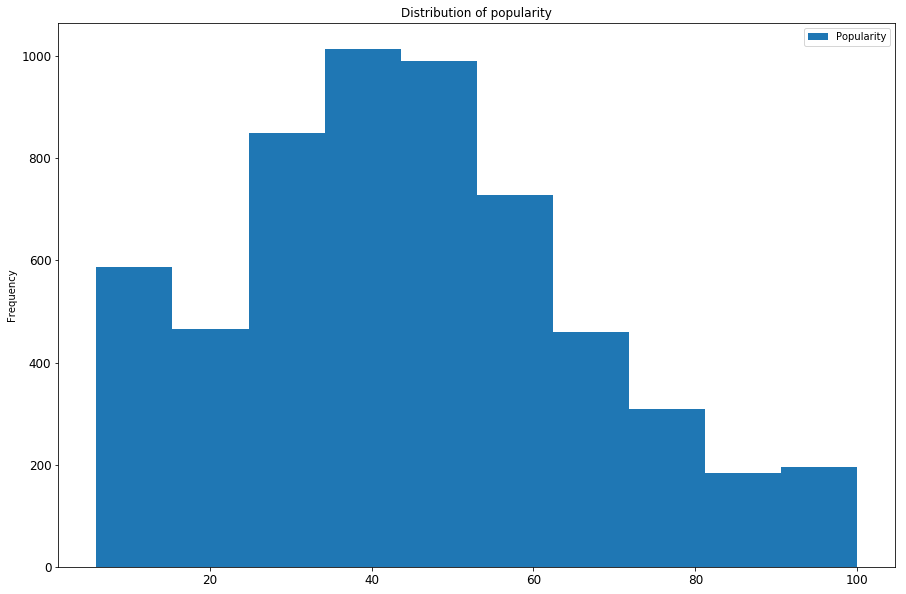

In [33]:
full.Popularity.plot(kind='hist',title="Distribution of popularity",figsize=(15, 10), legend=True, fontsize=12)

In [34]:
full["N_WORDS"].mean()

330.6067784886737

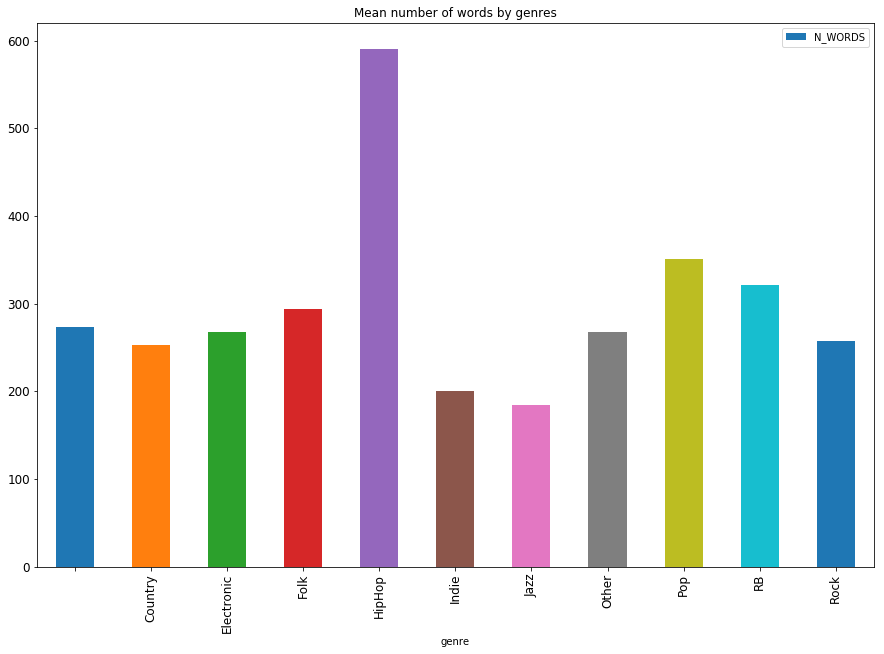

In [35]:
full.groupby('genre')['N_WORDS'].mean().plot(kind='bar', title ="Mean number of words by genres", figsize=(15, 10), legend=True, fontsize=12)